In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [59]:
df = pd.read_csv('diabetes.csv')

In [60]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [62]:
df.shape

(768, 9)

In [63]:
# Checking for any missing values
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [64]:
X = df.iloc[: ,:-1]
y = df.iloc[:,-1]

In [65]:
# Train test split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state=42)

In [66]:
# Random selection of k
k_random = np.random.choice(range(1,50,2))
print(f"Randomly selected k : {k_random}")

Randomly selected k : 47


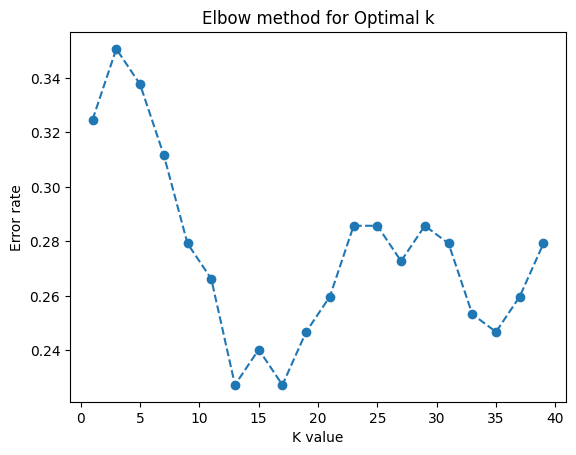

Best k from Elbow Method :13


In [68]:
# Elbow method
error_rates = []
k_values = range(1 ,40, 2)
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train , y_train)
  y_pred = knn.predict(X_test)
  error = 1 - accuracy_score(y_test , y_pred)
  error_rates.append(error)

# Plotting Elbow Method
plt.plot(k_values , error_rates , marker = 'o' , linestyle = 'dashed')
plt.xlabel('K value')
plt.ylabel('Error rate')
plt.title('Elbow method for Optimal k')
plt.show()

# Choosing the best k from the elbow point
best_k_value = k_values[np.argmin(error_rates)]
print(f"Best k from Elbow Method :{best_k_value}")

In [69]:
# Cross validation
best_k_cv = None
best_score = 0
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn , X,y, cv= 5)
  avg_score = scores.mean()
  if( avg_score > best_score) :
    best_score = avg_score
    best_k_cv = k

print(f"Best k form Cross-Validation : {best_k_cv}")

Best k form Cross-Validation : 13


In [70]:
# Comapre all k values
k_comparison = {
    "Random Selection " : k_random,
    "Elbow Method" : best_k_value,
    "Cross-validation" : best_k_cv
}
print("Comparison of k values:", k_comparison)

Comparison of k values: {'Random Selection ': 47, 'Elbow Method': 13, 'Cross-validation': 13}


In [71]:
# Train models
accuracy_results = {}
for method, k in k_comparison.items():
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[method] = accuracy
    print(f"Accuracy with {method} (k={k}): {accuracy:.4f}")

Accuracy with Random Selection  (k=47): 0.7338
Accuracy with Elbow Method (k=13): 0.7727
Accuracy with Cross-validation (k=13): 0.7727


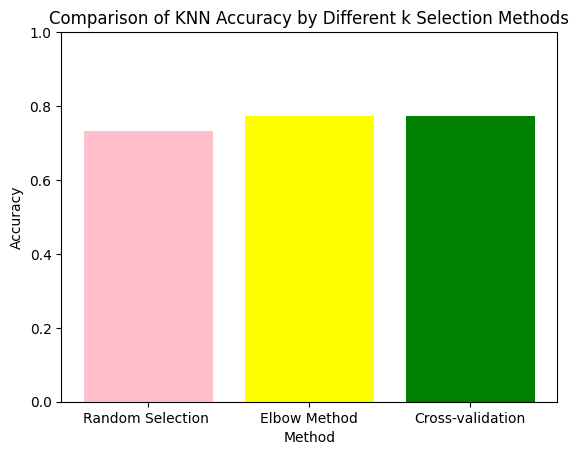

In [72]:
# Plot comparison
plt.bar(accuracy_results.keys(), accuracy_results.values(), color=['pink', 'yellow', 'green'])
plt.xlabel("Method")
plt.ylabel("Accuracy")
plt.title("Comparison of KNN Accuracy by Different k Selection Methods")
plt.ylim(0, 1)
plt.show()

In [73]:
# Train final model with best k from cross-validation
knn_final = KNeighborsClassifier(n_neighbors=best_k_cv)
knn_final.fit(X_train, y_train)
y_final_pred = knn_final.predict(X_test)
final_accuracy = accuracy_score(y_test, y_final_pred)
print(f"Final Model Accuracy with k={best_k_cv}: {final_accuracy:.4f}")

Final Model Accuracy with k=13: 0.7727


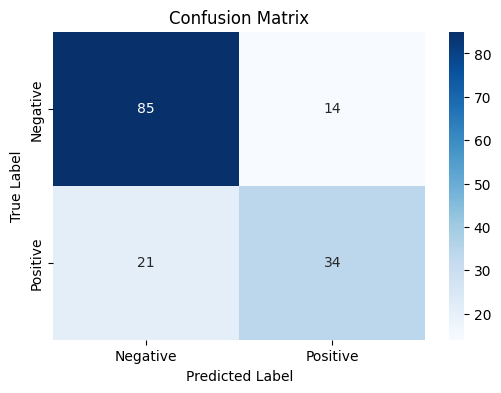

In [74]:
# Compute and plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_final_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()